Let's see, how clever and fast you are in coding

In [1]:
#Initial imports
from __plt__ import *
from __reader__ import *

import numpy as np

In [2]:
#Merging databases
source_path = r'E:/LICENSE/ProgsData/main/GAMAforOleg.txt'
input_path = r'E:/backup/backup_BPT/GAMA_ETG_OLA.csv'
output_path = r'E:/databases/Merged.csv'

bids_age = [[0.0, 8.8], [8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_age_plt = [[8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_mass = [[0.0, 10.0], [10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_mass_plt = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_z = [[0.0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.3], [0.3, 0.34]]
bids_z_plt = [[0.0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.3], [0.3, 0.34]]
merge_phys_databases(source_path, input_path, output_path)
calculating_mdms(output_path)

DataFrame = pd.read_csv(output_path)
print(np.median(DataFrame['Z_1']))

(1995, 1081)


e:\backup\backup_BPT\Sep2023\__reader__.py:12: DtypeWarning: Columns (0,241,244,245,270,284,290,294,305,319,323,340,356,357,375,389,391,430,449,451,467,468,500,521,632,684,716,728,761,769,770,771,772,773,775,821,850,918,950,968,973,1030,1031,1037,1038) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(output_path)


0.1868


C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_11300\2531437395.py:15: DtypeWarning: Columns (0,241,244,245,270,284,290,294,305,319,323,340,356,357,375,389,391,430,449,451,467,468,500,521,632,684,716,728,761,769,770,771,772,773,775,821,850,918,950,968,973,1030,1031,1037,1038) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(output_path)


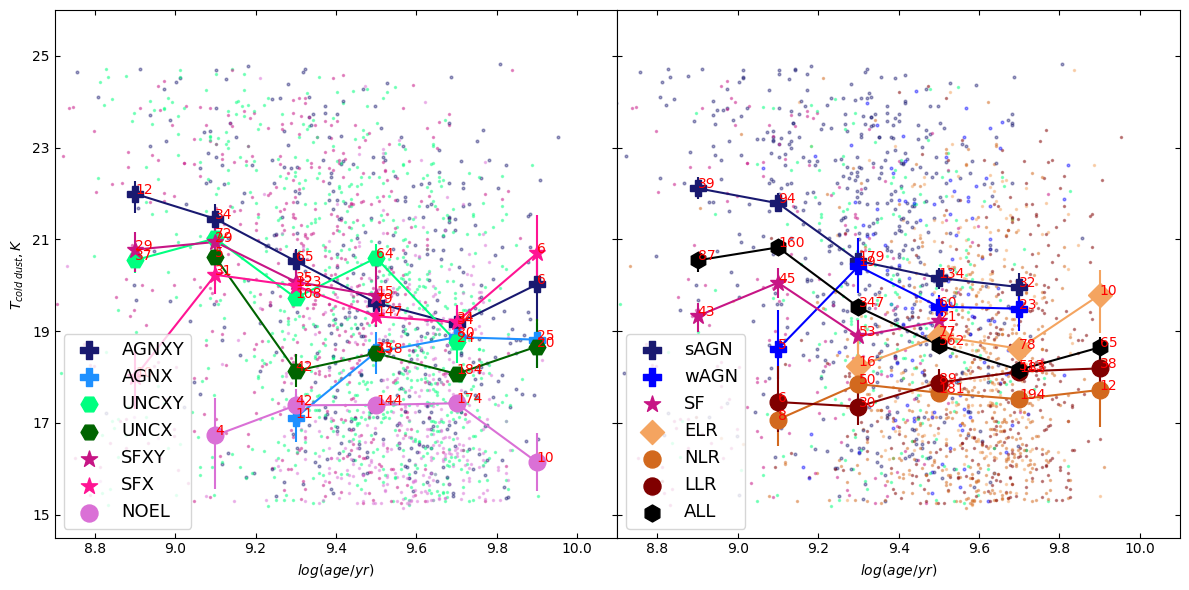

In [3]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'T_C_ISM_percentile50',
    'up' : 'T_C_ISM_percentile84',
    'down' : 'T_C_ISM_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [14.5, 26],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(15, 25.9, 2),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$T_{cold \; dust}, K$',
    'bids': bids_age_plt,
    'save_path' : r'./FIGURES/TDC_new.pdf'
})

In [4]:
# plotting({
#     'input_path' : output_path,
#     'x' : 'ager_percentile50',
#     'y' : 'T_W_BC_percentile50',
#     'up' : 'T_W_BC_percentile84',
#     'down' : 'T_W_BC_percentile16',
#     'xlim' : [8.7, 10.1],
#     'ylim' : [30, 61],
#     'xticks' : np.arange(8.8, 10.1, 0.2),
#     'yticks' : np.arange(30, 61, 5),
#     'xlabel' : r'$log(age/yr)$',
#     'ylabel' : r'$T_{warm \; dust}, K$',
#     'bids': bids_age_plt,
#     'save_path' : r'./FIGURES/TDW_new.pdf',
#     'pacs' : True
# })

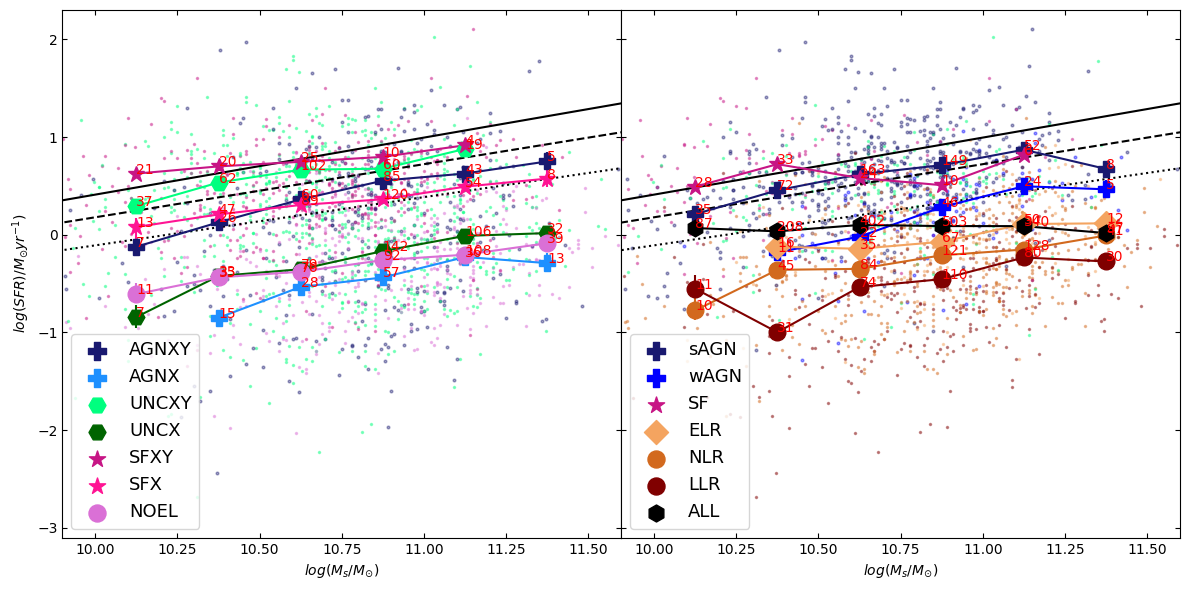

In [5]:
plotting({
    'input_path' : output_path,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.6],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : r'$log(M_s / M_{\odot})$',
    'ylabel' : r'$log(SFR) / M_{\odot} yr^{-1})$',
    'bids': bids_mass_plt,
    'save_path' : r'./FIGURES/SFRSM_new.pdf',
    'theor_lines' : 'sfrsm'
})

In [6]:
# plotting({
#     'input_path' : output_path,
#     'x' : 'Z_1',
#     'y' : 'mass_stellar_percentile50',
#     'up' : 'mass_stellar_percentile84',
#     'down' : 'mass_stellar_percentile16',
#     'xlim' : [0.0, 0.34],
#     'ylim' : [7, 11.6],
#     'xticks' : np.arange(0.0, 0.34, 0.05),
#     'yticks' : np.arange(7, 11.1, 1),
#     'xlabel' : r'$z$',
#     'ylabel' : r'$log(M_s / M_{\odot})$',
#     'bids': bids_z,
#     'save_path' : r'./FIGURES/MS_z.pdf'
# })

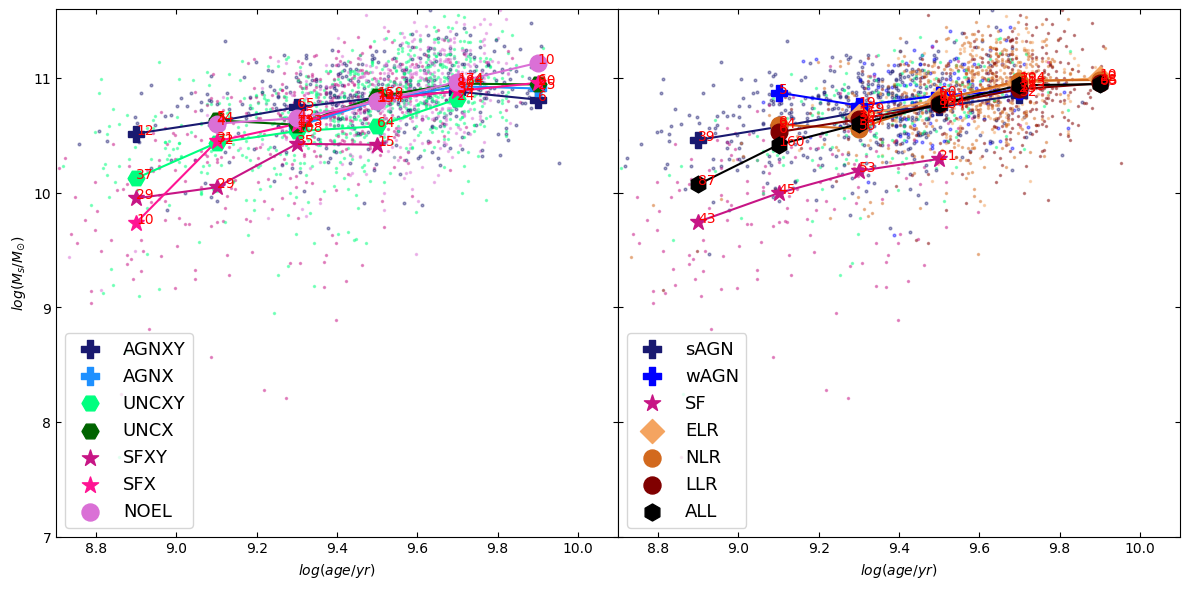

In [7]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'mass_stellar_percentile50',
    'up' : 'mass_stellar_percentile84',
    'down' : 'mass_stellar_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [7, 11.6],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(7, 11.1, 1),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$log(M_s / M_{\odot})$',
    'bids': bids_age_plt,
    'save_path' : r'./FIGURES/MS_age.pdf'
})

In [8]:
# plotting({
#     'input_path' : output_path,
#     'x' : 'ager_percentile50',
#     'y' : 'mass_dust_percentile50',
#     'up' : 'mass_dust_percentile84',
#     'down' : 'mass_dust_percentile16',
#     'xlim' : [8.7, 10.1],
#     'ylim' : [5.5, 9.7],
#     'xticks' : np.arange(8.8, 10.1, 0.2),
#     'yticks' : np.arange(5.5, 9.7, 1),
#     'xlabel' : r'$log(age/yr)$',
#     'ylabel' : r'$log(M_{dust}/M_{\odot})$',
#     'bids': bids_age_plt,
#     'save_path' : r'./FIGURES/MD_age_new.pdf'
# })

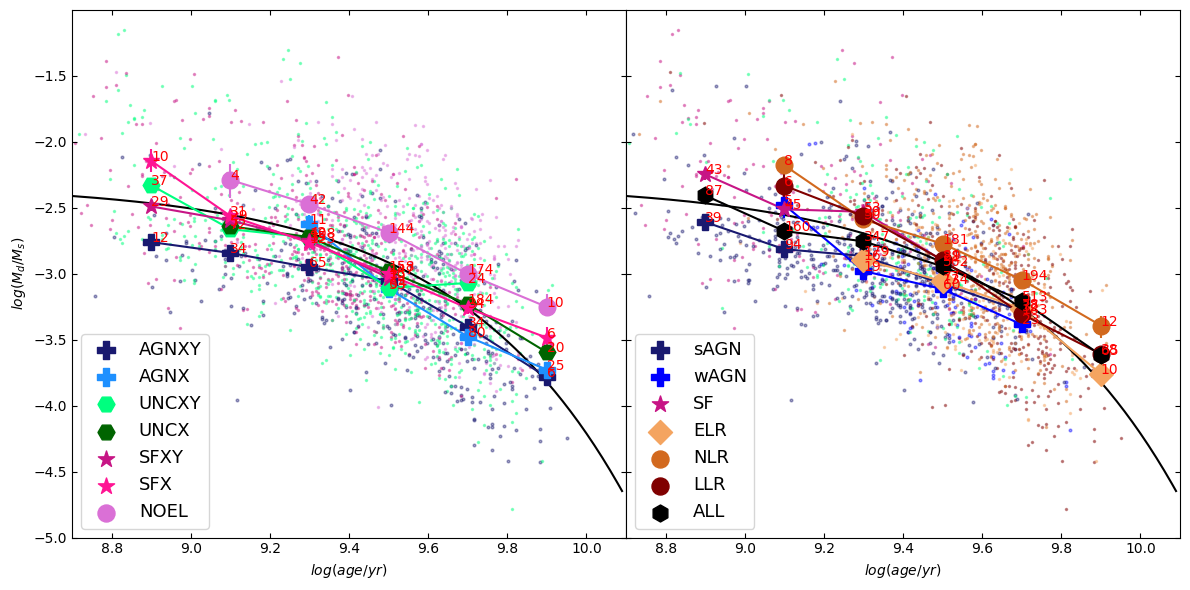

In [9]:
plotting({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'y' : 'mdms_percentile50',
    'up' : 'mdms_percentile84',
    'down' : 'mdms_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [-5, -1],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(-5, -1, 0.5),
    'xlabel' : r'$log(age/yr)$',
    'ylabel' : r'$log(M_{d}/M_{s})$',
    'bids': bids_age_plt,
    'save_path' : r'./FIGURES/MDMS_age_new.pdf',
    'theor_lines' : 'mdms'
})

In [10]:
# plotting({
#     'input_path' : output_path,
#     'x' : 'Z_1',
#     'y' : 'ager_percentile50',
#     'up' : 'ager_percentile84',
#     'down' : 'ager_percentile16',
#     'xlim' : [0.0, 0.34],
#     'ylim' : [8.7, 10.1],
#     'xticks' : np.arange(0.0, 0.34, 0.05),
#     'yticks' : np.arange(8.8, 10.1, 0.2),
#     'xlabel' : r'$z$',
#     'ylabel' : r'$log(age/yr)$',
#     'bids': bids_z,
#     'save_path' : r'./FIGURES/Age_z_new.pdf'
# })

In [11]:
# plotting({
#     'input_path' : output_path,
#     'x' : 'mass_stellar_percentile50',
#     'y' : 'SurfaceDensity',
#     'err' : 'SurfaceDensityErr',
#     'xlim' : [9.9, 11.6],
#     'ylim' : [0, 100],
#     'xticks' : np.arange(10.0, 11.6, 0.25),
#     'yticks' : np.arange(0, 100, 10),
#     'xlabel' : r'$log(M_s/M_{\odot})$',
#     'ylabel' : r'$SurfaceDensity$',
#     'bids': bids_mass,
#     'save_path' : r'./FIGURES/Age_z_new.pdf'
# })

Various bin figures

e:\backup\backup_BPT\Sep2023\__plt__.py:159: DtypeWarning: Columns (0,241,244,245,270,284,290,294,305,319,323,340,356,357,375,389,391,430,449,451,467,468,500,521,632,684,716,728,761,769,770,771,772,773,775,821,850,918,950,968,973,1030,1031,1037,1038) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(pars_dict['input_path'])


AGN [0, 0, 6, 23, 52, 27, 6] 114
AGNX [0, 0, 3, 9, 27, 79, 25] 143
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [1, 3, 10, 18, 27, 19, 0] 78
UNCX [0, 0, 3, 32, 136, 183, 20] 374
UNCY [1, 0, 0, 0, 3, 0, 0] 4
SF [1, 2, 1, 4, 8, 1, 0] 17
SFX [0, 3, 10, 47, 104, 32, 6] 202
SFY [0, 0, 0, 0, 4, 0, 0] 4
NOEL [1, 2, 3, 35, 138, 173, 10] 362
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [4, 10, 36, 168, 499, 514, 67] 1298


AGN [4, 12, 28, 42, 27, 7, 0] 120
AGNX [0, 1, 0, 2, 6, 1, 0] 10
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [9, 34, 62, 90, 37, 5, 0] 237
UNCX [0, 3, 2, 10, 22, 1, 0] 38
UNCY [0, 0, 3, 1, 0, 0, 0] 4
SF [18, 27, 28, 31, 7, 2, 0] 113
SFX [9, 7, 21, 76, 43, 2, 0] 158
SFY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [1, 1, 1, 7, 6, 1, 0] 17
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [41, 85, 145, 259, 148, 19, 0] 697


AGN [4, 12, 34, 65, 79, 34, 6] 234
AGNX [0, 1, 3, 11, 33, 80, 25] 153
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [10, 37, 72, 108, 64, 24, 0] 315
UNCX [0, 3, 5, 42, 158, 184, 20] 412
UNCY [1, 0, 3, 1, 3, 0, 0] 8
SF [19, 29, 29, 35, 15, 

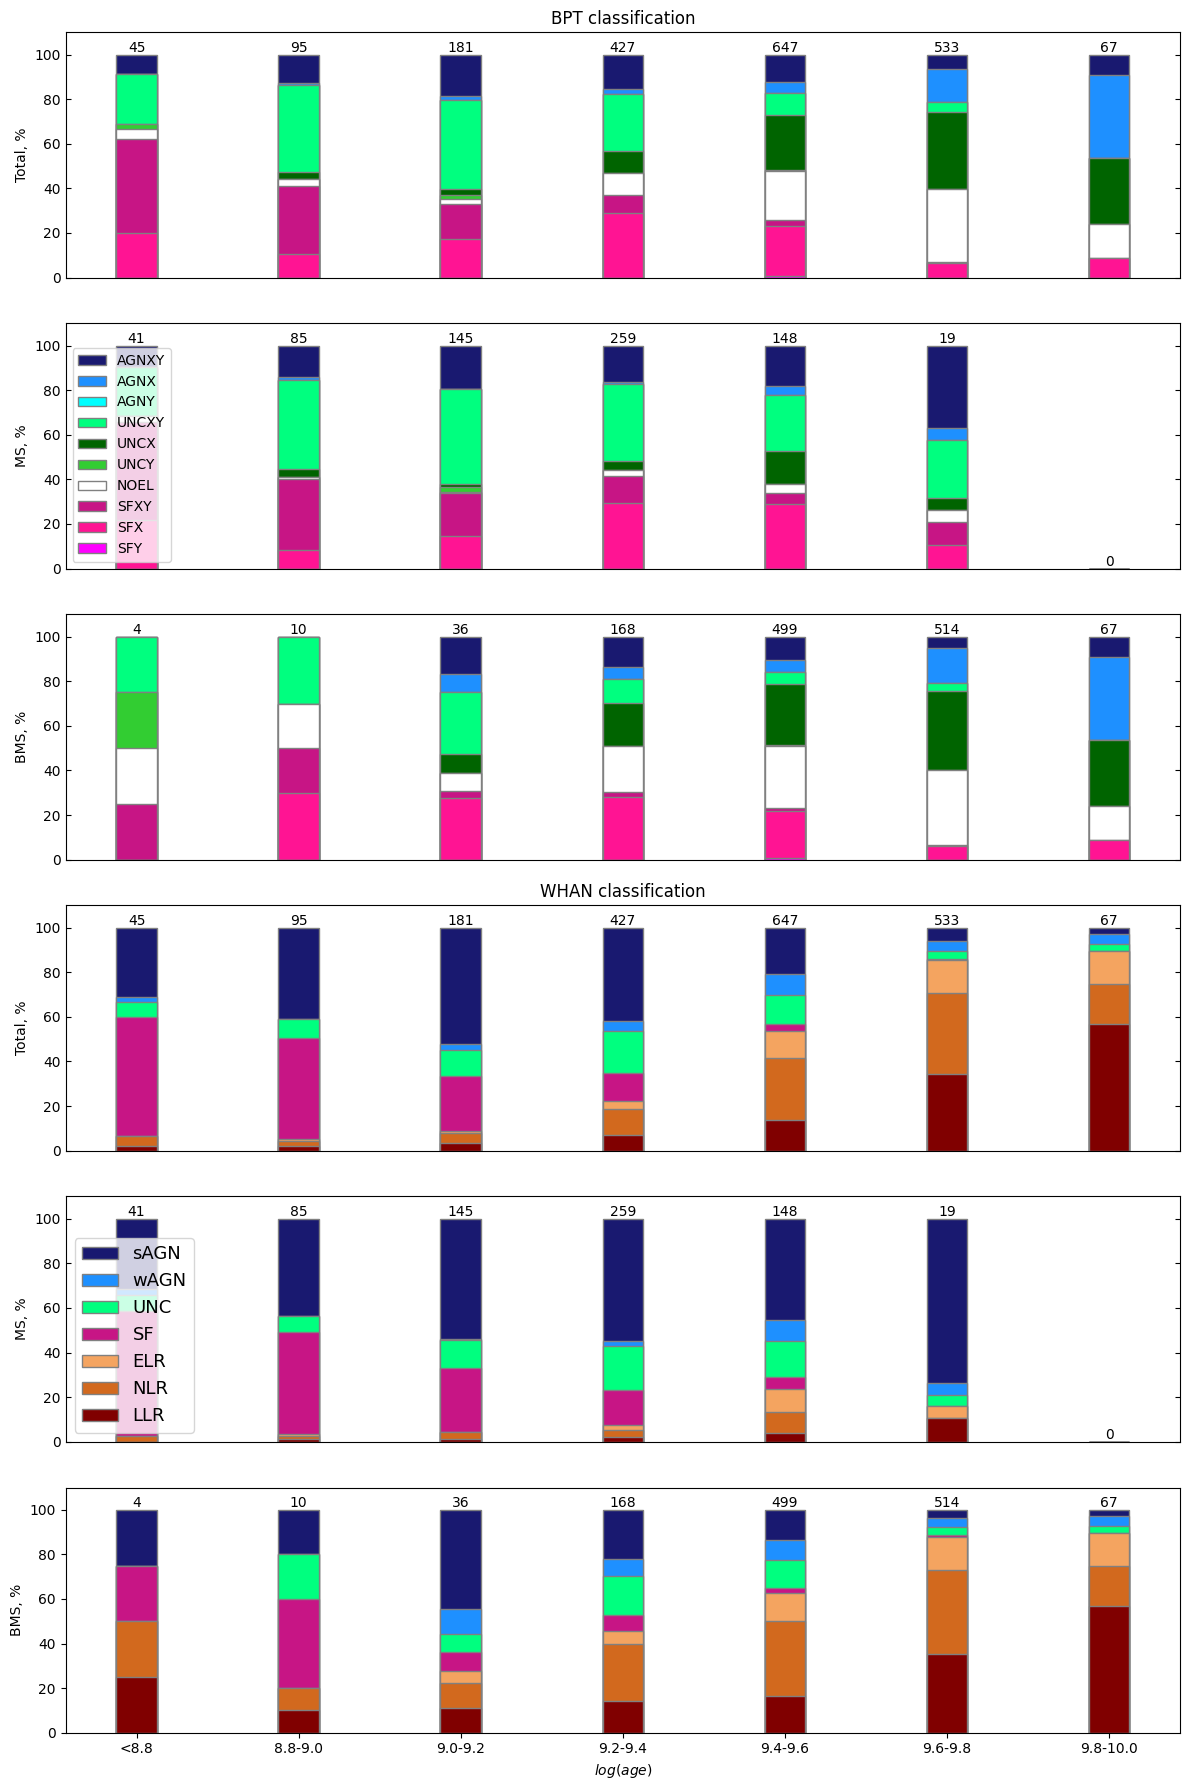

In [12]:
bin_stats({
    'input_path' : output_path,
    'x' : 'ager_percentile50',
    'xlabel' : r'$log(age)$',
    'bins' : bids_age,
    'bins_names' : ['<8.8', '8.8-9.0', '9.0-9.2', '9.2-9.4', '9.4-9.6', '9.6-9.8', '9.8-10.0'],
    'save_path' : r'./FIGURES/AGE_SNAPSHOTS.pdf'
}
)

e:\backup\backup_BPT\Sep2023\__plt__.py:159: DtypeWarning: Columns (0,241,244,245,270,284,290,294,305,319,323,340,356,357,375,389,391,430,449,451,467,468,500,521,632,684,716,728,761,769,770,771,772,773,775,821,850,918,950,968,973,1030,1031,1037,1038) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(pars_dict['input_path'])


AGN [3, 5, 14, 30, 35, 23, 3] 113
AGNX [1, 3, 13, 28, 53, 33, 12] 143
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [6, 8, 13, 21, 21, 6, 3] 78
UNCX [7, 6, 25, 74, 131, 97, 29] 369
UNCY [2, 0, 0, 1, 1, 0, 0] 4
SF [4, 2, 2, 5, 2, 2, 0] 17
SFX [9, 5, 22, 45, 81, 31, 8] 201
SFY [1, 0, 2, 0, 1, 0, 0] 4
NOEL [9, 11, 33, 75, 88, 105, 36] 357
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [42, 40, 124, 279, 413, 297, 91] 1286


AGN [4, 3, 12, 33, 46, 20, 2] 120
AGNX [0, 0, 2, 2, 5, 1, 0] 10
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [26, 31, 53, 77, 38, 12, 0] 237
UNCX [1, 1, 10, 10, 10, 6, 0] 38
UNCY [0, 2, 1, 1, 0, 0, 0] 4
SF [45, 19, 19, 19, 8, 2, 1] 113
SFX [19, 10, 26, 45, 40, 18, 0] 158
SFY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [4, 1, 2, 4, 4, 2, 0] 17
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [99, 67, 125, 191, 151, 61, 3] 697


AGN [7, 8, 26, 63, 81, 43, 5] 233
AGNX [1, 3, 15, 30, 58, 34, 12] 153
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [32, 39, 66, 98, 59, 18, 3] 315
UNCX [8, 7, 35, 84, 141, 103, 29] 407
UNCY [2, 2, 1, 2, 1, 0, 0] 8
SF [49, 21, 21

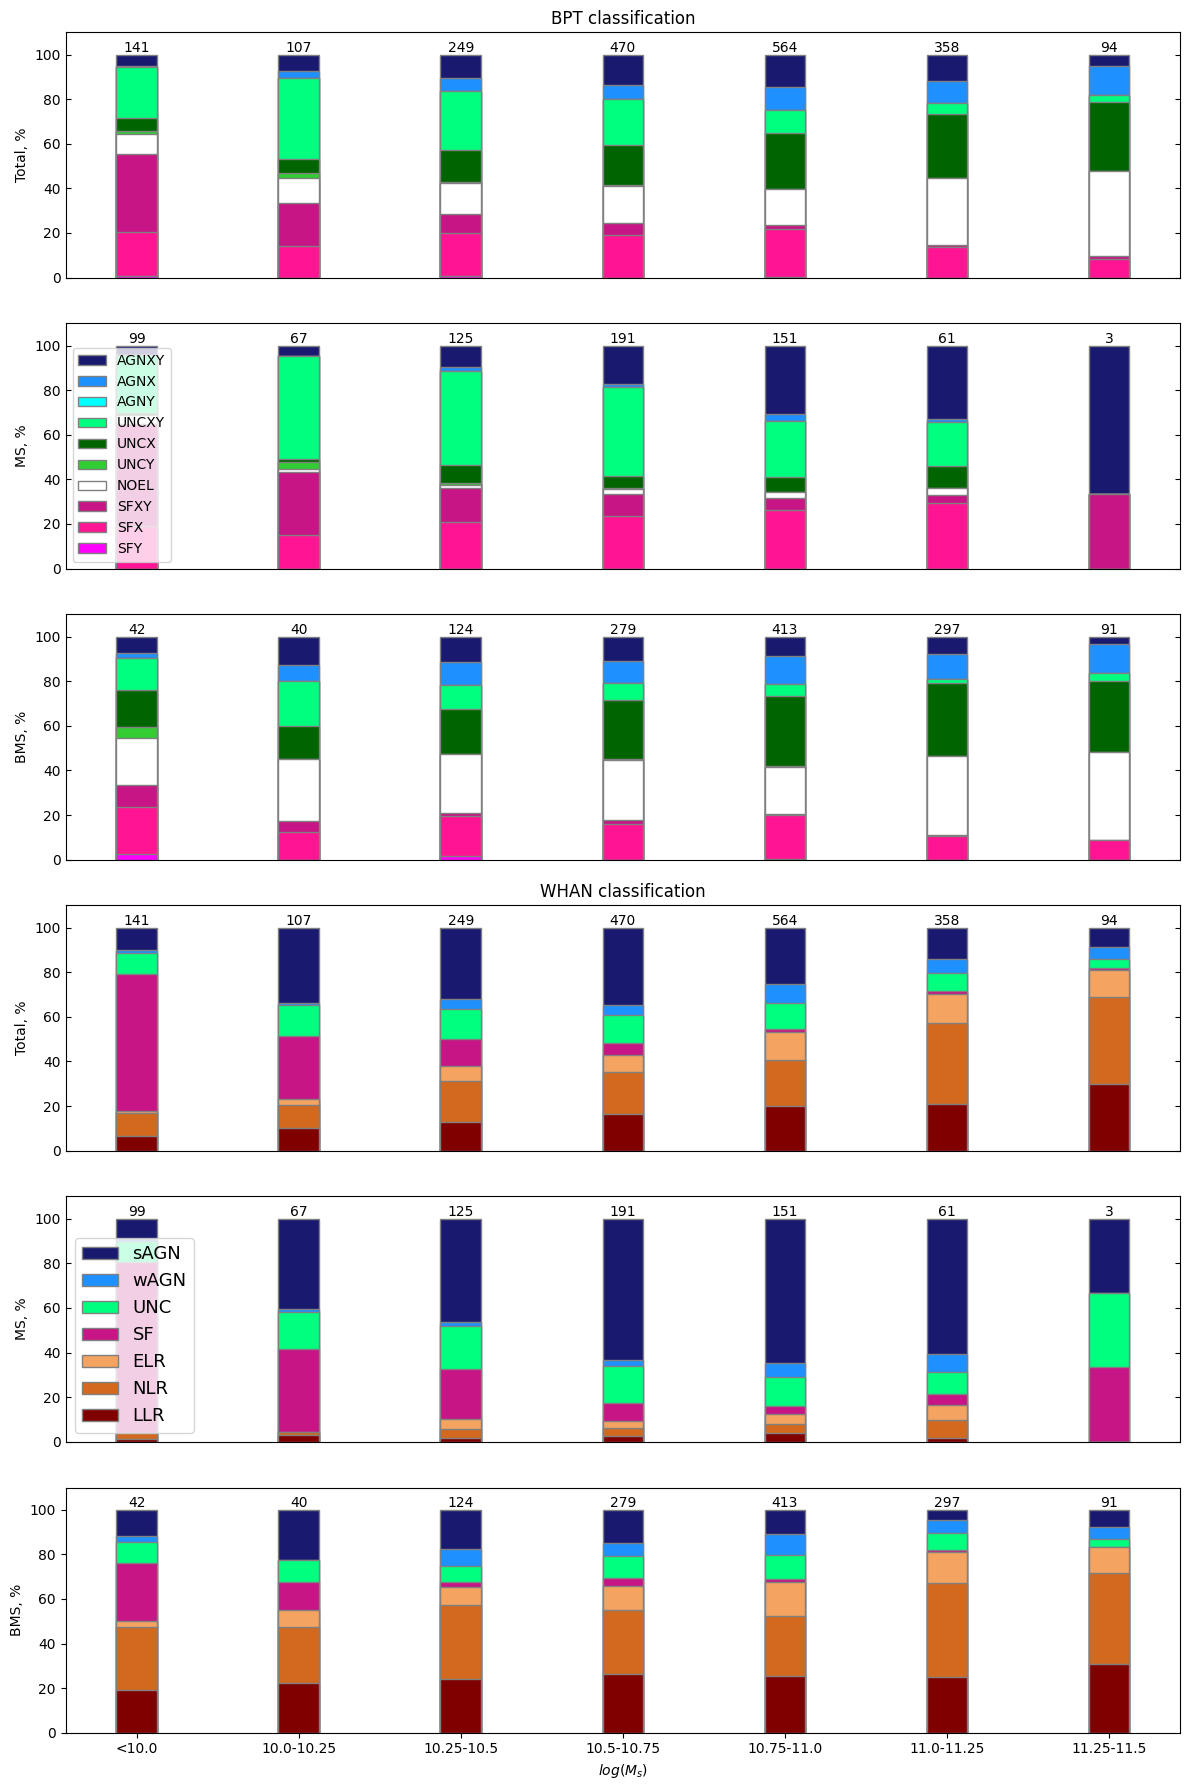

In [13]:
bin_stats({
    'input_path' : output_path,
    'x' : 'mass_stellar_percentile50',
    'xlabel' : r'$log(M_s)$',
    'bins' : bids_mass,
    'bins_names' : ['<10.0', '10.0-10.25', '10.25-10.5', '10.5-10.75', '10.75-11.0', '11.0-11.25', '11.25-11.5'],
    'save_path' : r'./FIGURES/MASS_SNAPSHOTS.pdf'
}
)

e:\backup\backup_BPT\Sep2023\__plt__.py:159: DtypeWarning: Columns (0,241,244,245,270,284,290,294,305,319,323,340,356,357,375,389,391,430,449,451,467,468,500,521,632,684,716,728,761,769,770,771,772,773,775,821,850,918,950,968,973,1030,1031,1037,1038) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(pars_dict['input_path'])


AGN [8, 17, 25, 26, 18, 13, 7] 114
AGNX [16, 37, 36, 28, 10, 10, 6] 143
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [4, 12, 18, 15, 12, 12, 5] 78
UNCX [10, 46, 81, 97, 56, 65, 19] 374
UNCY [0, 0, 1, 1, 1, 1, 0] 4
SF [2, 3, 2, 5, 1, 3, 1] 17
SFX [10, 16, 40, 47, 36, 44, 9] 202
SFY [0, 0, 2, 1, 0, 0, 1] 4
NOEL [2, 7, 45, 69, 85, 115, 39] 362
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [52, 138, 250, 289, 219, 263, 87] 1298


AGN [1, 21, 19, 19, 25, 23, 12] 120
AGNX [1, 5, 3, 0, 1, 0, 0] 10
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [6, 29, 48, 39, 41, 55, 19] 237
UNCX [1, 5, 15, 5, 4, 7, 1] 38
UNCY [0, 0, 0, 0, 2, 1, 1] 4
SF [11, 14, 22, 23, 16, 18, 9] 113
SFX [2, 12, 37, 38, 23, 33, 13] 158
SFY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [0, 1, 5, 2, 1, 7, 1] 17
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [22, 87, 149, 126, 113, 144, 56] 697


AGN [9, 38, 44, 45, 43, 36, 19] 234
AGNX [17, 42, 39, 28, 11, 10, 6] 153
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [10, 41, 66, 54, 53, 67, 24] 315
UNCX [11, 51, 96, 102, 60, 72, 20] 412
UNCY [0, 0, 1, 1, 3, 2, 1] 

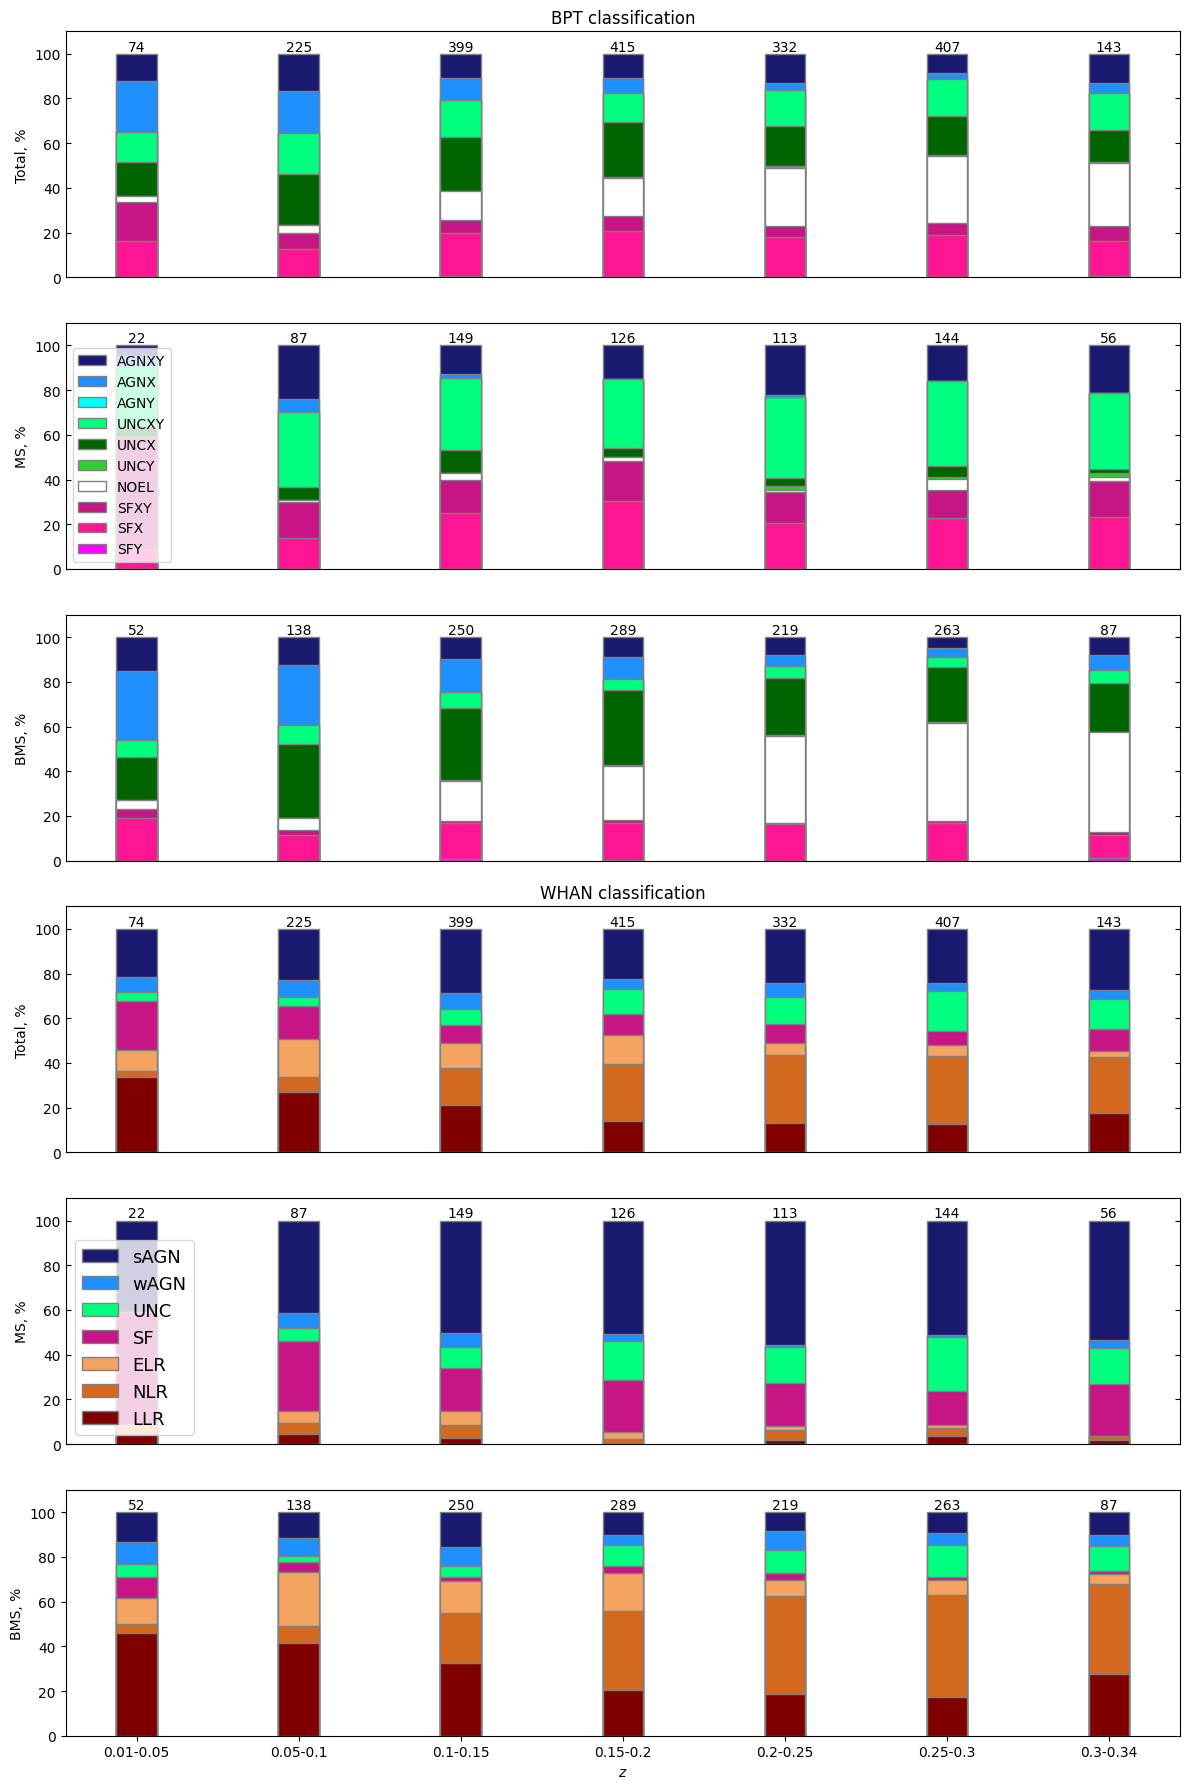

In [14]:
bin_stats({
    'input_path' : output_path,
    'x' : 'Z_1',
    'xlabel' : r'$z$',
    'bins' : bids_z,
    'bins_names' : ['0.01-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', '0.3-0.34'],
    'save_path' : r'./FIGURES/RED_SNAPSHOTS.pdf'
}
)